In [ ]:
""""
In this project, we'll mostly focus on the effects of different parameters of our functions, 
approaches and that kind of stuff.
"""

# Reading & Understanding the Behaviour of Data

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

car_df = pd.read_csv(r'C:\Users\aksak\OneDrive\Masaüstü\DataJarlabs_Assignments\CarPrice_Assignment.csv')
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.100,...,141,mpfi,3.780,3.150,9.500,114,5400,23,28,16845.000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.100,...,141,mpfi,3.780,3.150,8.700,160,5300,19,25,19045.000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.100,...,173,mpfi,3.580,2.870,8.800,134,5500,18,23,21485.000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.100,...,145,idi,3.010,3.400,23.000,106,4800,26,27,22470.000


In [112]:
car_df = car_df.drop(['car_ID'], axis=1)

In [113]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [114]:
car_df.price.describe()

count     205.000
mean    13276.711
std      7988.852
min      5118.000
25%      7788.000
50%     10295.000
75%     16503.000
max     45400.000
Name: price, dtype: float64

In [115]:
# observe that mean > %50 for car_prices for further intuitions.

In [116]:
car_df.describe(include=['O'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [117]:
for x in car_df.columns:
    #printing unique values
    print(x ,':', len(car_df[x].unique()))

symboling : 6
CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


In [118]:
car_df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [119]:
#this shows that there are lots of overlapping/non-distinguishable car names for this dataset.

# Data Cleaning

In [120]:
#since there is no null values in any column, we don't have to deal with fillna or something else.
#to get only the brand names of the cars, we can use split function for strings as in the below code;

BrandName = car_df['CarName'].apply(lambda x : x.split(' ')[0])
car_df.insert(3,"BrandName",BrandName)
car_df.drop(['CarName'],axis=1,inplace=True)
car_df.head()

,symboling,fueltype,BrandName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.600,168.800,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.600,168.800,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.500,171.200,...,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,2,gas,audi,std,four,sedan,fwd,front,99.800,176.600,...,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,2,gas,audi,std,four,sedan,4wd,front,99.400,176.600,...,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


In [121]:
car_df['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [122]:
#dealing with wrong spellings

def replace_Names(name1,name2):
    car_df['BrandName'].replace(name1,name2,inplace=True);

replace_Names('maxda','mazda');
replace_Names('Nissan','nissan');
replace_Names('porcshce','porsche');
replace_Names('toyouta','toyota');
replace_Names('vokswagen','volkswagen');
replace_Names('vw','volkswagen');

car_df['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [123]:
car_df.describe(include=['O'])

,fueltype,BrandName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,2,22,2,2,5,3,2,7,7,8
top,gas,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,32,168,115,96,120,202,148,159,94


so the unique values of BrandNames reduced to 22 from 147.

In [124]:
car_df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

# Behavior of the Target Variable

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

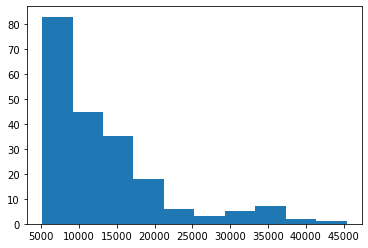

In [125]:
plt.hist(car_df['price'])

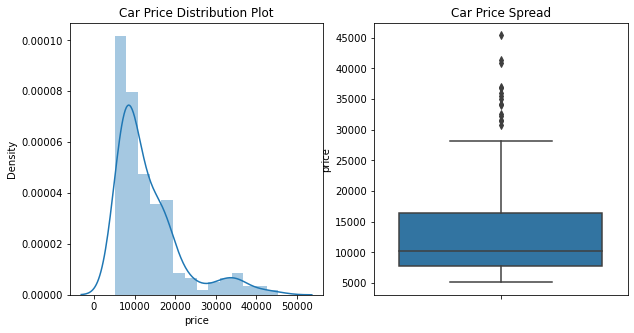

In [126]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_df.price)

plt.show()

This shows that our target variable is **not** normally distributed.

# Correlation of Numerical Values

In [127]:
numerical_columns_df = car_df.select_dtypes(exclude='object')

In [128]:
numerical_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


<AxesSubplot:>

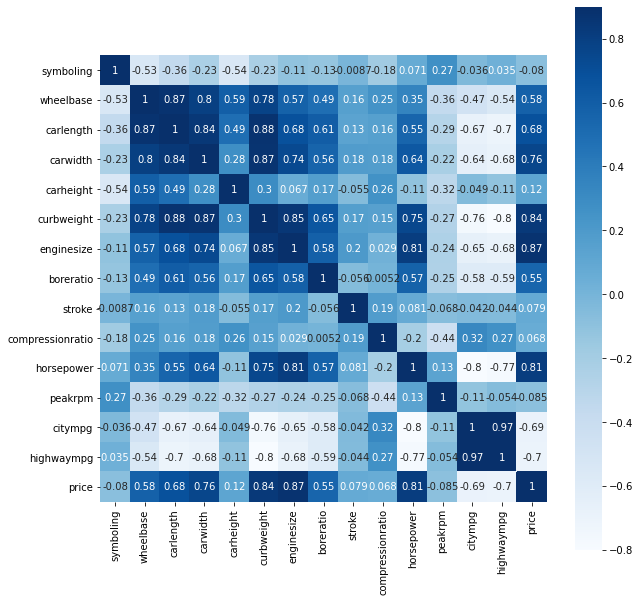

In [129]:
corr = numerical_columns_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot=True)

In [130]:
# this heatmap shows that enginesize, curbweight, horsepower, carwidth, and the carlength
# are the most correlated features with car price.

# PCA on Numerical Features

In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [132]:
X = numerical_columns_df.values
len(numerical_columns_df.columns)

15

In [133]:
X = StandardScaler().fit_transform(numerical_columns_df)
pca = PCA(n_components=15)
principalComponents=pca.fit_transform(X)

In [134]:
exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.49737394 0.17573473 0.08527536 0.06301976 0.0418972  0.03684286
 0.02829451 0.02267827 0.0174146  0.00894471 0.00778045 0.00530398
 0.00480471 0.00336544 0.00126947]
[ 49.74  67.31  75.84  82.14  86.33  90.01  92.84  95.11  96.85  97.74
  98.52  99.05  99.53  99.87 100.  ]


In [135]:
#so we can have the 95.11% of the variance with only the first 8 variables.
#but I wanted to make PCA on only with the highly-correlated features only

# PCA on highly-correlated features only

In [136]:
corr_features = car_df[['enginesize','curbweight',
                       'horsepower','carwidth','carlength']]
corr_features

,enginesize,curbweight,horsepower,carwidth,carlength
0,130,2548,111,64.100,168.800
1,130,2548,111,64.100,168.800
2,152,2823,154,65.500,171.200
3,109,2337,102,66.200,176.600
4,136,2824,115,66.400,176.600
...,...,...,...,...,...
200,141,2952,114,68.900,188.800
201,141,3049,160,68.800,188.800
202,173,3012,134,68.900,188.800
203,145,3217,106,68.900,188.800


In [137]:
X = corr_features.values

In [138]:
X = StandardScaler().fit_transform(corr_features)
pca = PCA(n_components=5)
principalComponents=pca.fit_transform(X)

In [139]:
exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.81066348 0.11039875 0.03515548 0.03033229 0.01345   ]
[ 81.07  92.11  95.63  98.66 100.01]


Text(0, 0.5, '% of Variance Explained')

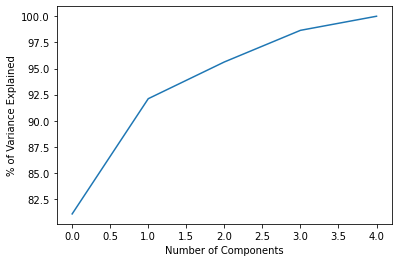

In [140]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

In [141]:
#Hence the enginesize & the curbweight explains the 92.11% of the variance.

# Behavior of these features

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

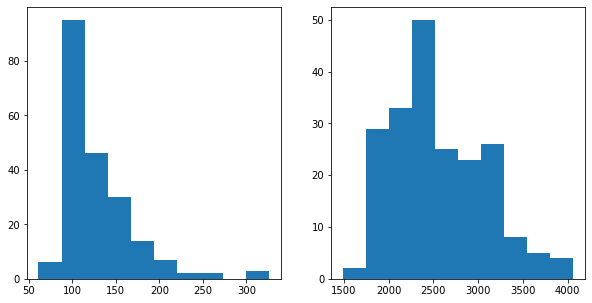

In [142]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(corr_features['enginesize'])

plt.subplot(122)
plt.hist(corr_features.curbweight)

{'whiskers': [<matplotlib.lines.Line2D at 0x21310916730>,
 'caps': [<matplotlib.lines.Line2D at 0x21312240280>,
 'boxes': [<matplotlib.lines.Line2D at 0x21310916f70>],
 'medians': [<matplotlib.lines.Line2D at 0x21313915cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2131393fa30>],
 'means': []}

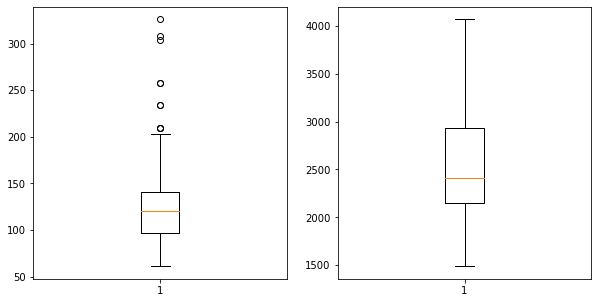

In [143]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.boxplot(corr_features['enginesize'])

plt.subplot(122)
plt.boxplot(corr_features.curbweight)

In [144]:
# It may be good to winsorize the enginesize.

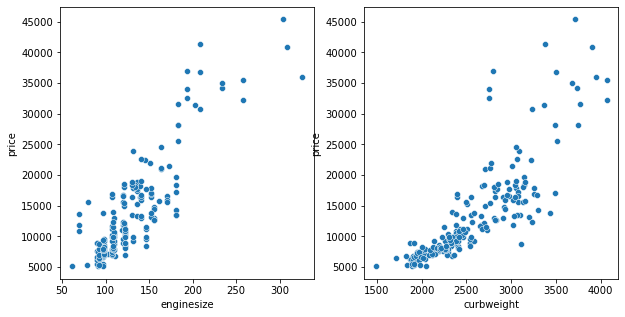

In [145]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(corr_features['enginesize'], car_df.price)

plt.subplot(122)
sns.scatterplot(corr_features['curbweight'], car_df.price)

plt.show()

# Observations on Categorical Variables

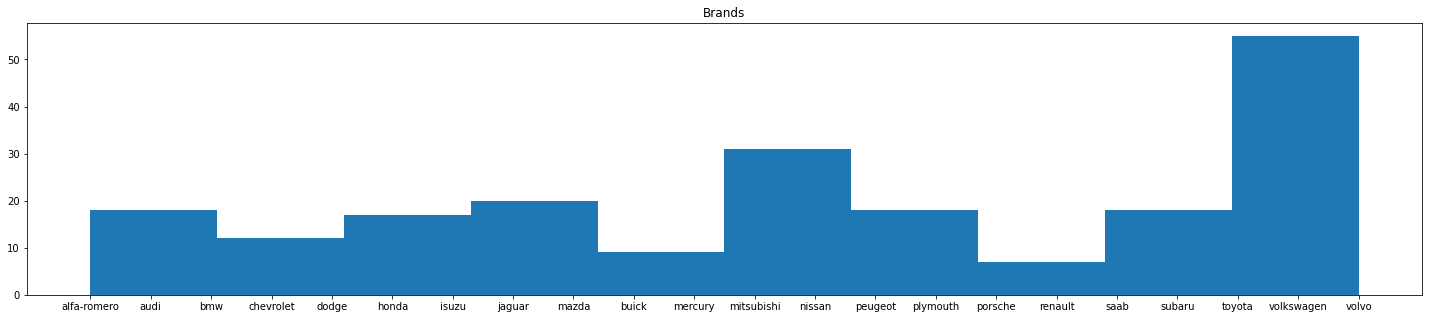

In [146]:
plt.figure(figsize=(25, 5))
plt.hist(car_df.BrandName)
plt.title('Brands')
plt.show()

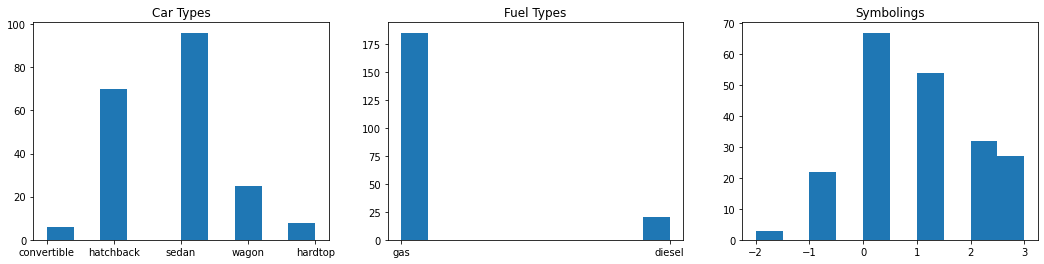

In [147]:
plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.hist(car_df.carbody)
plt.title('Car Types')

plt.subplot(132)
plt.hist(car_df.fueltype)
plt.title('Fuel Types')

plt.subplot(133)
plt.hist(car_df.symboling)
plt.title('Symbolings')

plt.show()

In [148]:
print(car_df.groupby('BrandName')['price'].mean().sort_values(ascending=False))
print('-----'*5)
print(car_df.groupby('carbody')['price'].mean().sort_values(ascending=False))
print('-----'*5)
print(car_df.groupby('fueltype')['price'].mean().sort_values(ascending=False))
print('-----'*5)
print(car_df.groupby('symboling')['price'].mean().sort_values(ascending=False))

BrandName
jaguar        34600.000
buick         33647.000
porsche       31400.500
bmw           26118.750
volvo         18063.182
audi          17859.167
mercury       16503.000
alfa-romero   15498.333
peugeot       15489.091
saab          15223.333
mazda         10652.882
nissan        10415.667
volkswagen    10077.500
toyota         9885.812
renault        9595.000
mitsubishi     9239.769
isuzu          8916.500
subaru         8541.250
honda          8184.692
plymouth       7963.429
dodge          7875.444
chevrolet      6007.000
Name: price, dtype: float64
-------------------------
carbody
hardtop       22208.500
convertible   21890.500
sedan         14344.271
wagon         12371.960
hatchback     10376.652
Name: price, dtype: float64
-------------------------
fueltype
diesel   15838.150
gas      12999.798
Name: price, dtype: float64
-------------------------
symboling
-1   17330.682
 3   17221.296
-2   15781.667
 0   14366.965
 2   10109.281
 1   10037.907
Name: price, dtype: float

<Figure size 1800x432 with 0 Axes>

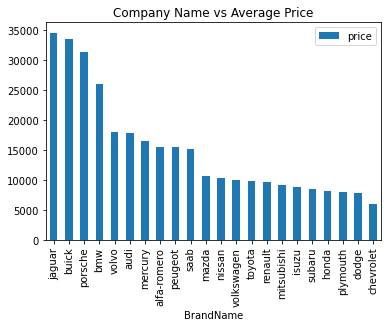

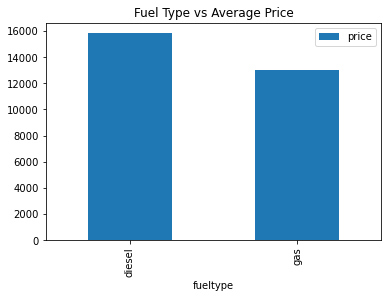

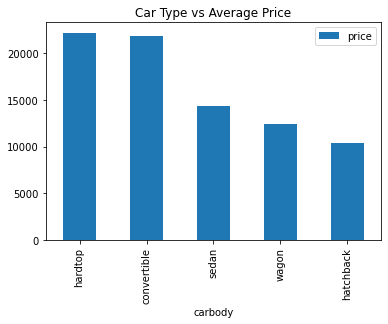

In [149]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car_df.groupby(['BrandName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(car_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(car_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

# Feature Engineering

In [150]:
corr_features['enginesize*curbweight'] = corr_features['enginesize'] * corr_features['curbweight']
corr_features['cararea'] = numerical_columns_df['carwidth'] * numerical_columns_df['carlength'] 
corr_features['carvolume'] = numerical_columns_df['carwidth'] * numerical_columns_df['carlength'] * numerical_columns_df['carlength']
corr_features['price'] = car_df['price']
corr_features['curbwithoutengine'] = corr_features['curbweight'] / corr_features['enginesize']
corr_features.corr()

,enginesize,curbweight,horsepower,carwidth,carlength,enginesize*curbweight,cararea,carvolume,price,curbwithoutengine
enginesize,1.000,0.851,0.810,0.735,0.683,0.983,0.729,0.720,0.874,-0.683
curbweight,0.851,1.000,0.751,0.867,0.878,0.904,0.907,0.901,0.835,-0.275
horsepower,0.810,0.751,1.000,0.641,0.553,0.791,0.600,0.580,0.808,-0.464
carwidth,0.735,0.867,0.641,1.000,0.841,0.787,0.926,0.900,0.759,-0.247
carlength,0.683,0.878,0.553,0.841,1.000,0.736,0.982,0.990,0.683,-0.169
enginesize*curbweight,0.983,0.904,0.791,0.787,0.736,1.000,0.785,0.779,0.889,-0.562
cararea,0.729,0.907,0.600,0.926,0.982,0.785,1.000,0.997,0.738,-0.203
carvolume,0.720,0.901,0.580,0.900,0.990,0.779,0.997,1.000,0.728,-0.194
price,0.874,0.835,0.808,0.759,0.683,0.889,0.738,0.728,1.000,-0.440
curbwithoutengine,-0.683,-0.275,-0.464,-0.247,-0.169,-0.562,-0.203,-0.194,-0.440,1.000


It looks like creating a new feature by dividing while trying to model a large valued feature is not a smart move.

{'whiskers': [<matplotlib.lines.Line2D at 0x21315143880>,
 'caps': [<matplotlib.lines.Line2D at 0x21315143f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x21315143520>],
 'medians': [<matplotlib.lines.Line2D at 0x2131514f670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2131514f9d0>],
 'means': []}

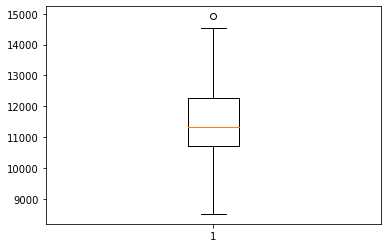

In [151]:
plt.boxplot(corr_features.cararea)

<AxesSubplot:xlabel='enginesize*curbweight', ylabel='price'>

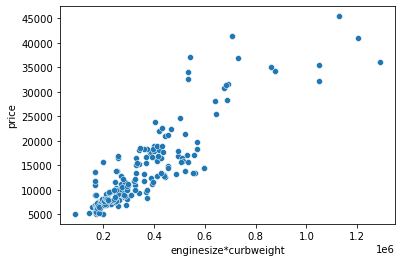

In [152]:
sns.scatterplot(corr_features['enginesize*curbweight'], car_df.price)

In [153]:
from scipy.stats.mstats import winsorize

{'whiskers': [<matplotlib.lines.Line2D at 0x213154f50a0>,
 'caps': [<matplotlib.lines.Line2D at 0x213154f5760>,
 'boxes': [<matplotlib.lines.Line2D at 0x213154e6cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x213154f5e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x213155021c0>],
 'means': []}

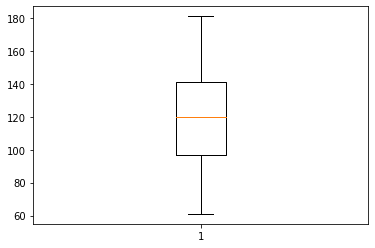

In [154]:
#Winsorization of the enginesize
winsorizing_enginesize= winsorize(np.array(car_df.enginesize), (0, 0.1))
plt.boxplot(winsorizing_enginesize)

In [155]:
corr_features['winsorized_enginesize'] = pd.DataFrame(winsorizing_enginesize)
corr_features['winsorized_enginesize'].head(5)

0    130
1    130
2    152
3    109
4    136
Name: winsorized_enginesize, dtype: int64

In [156]:
corr_features.corr()

,enginesize,curbweight,horsepower,carwidth,carlength,enginesize*curbweight,cararea,carvolume,price,curbwithoutengine,winsorized_enginesize
enginesize,1.000,0.851,0.810,0.735,0.683,0.983,0.729,0.720,0.874,-0.683,0.914
curbweight,0.851,1.000,0.751,0.867,0.878,0.904,0.907,0.901,0.835,-0.275,0.860
horsepower,0.810,0.751,1.000,0.641,0.553,0.791,0.600,0.580,0.808,-0.464,0.804
carwidth,0.735,0.867,0.641,1.000,0.841,0.787,0.926,0.900,0.759,-0.247,0.730
carlength,0.683,0.878,0.553,0.841,1.000,0.736,0.982,0.990,0.683,-0.169,0.706
enginesize*curbweight,0.983,0.904,0.791,0.787,0.736,1.000,0.785,0.779,0.889,-0.562,0.879
cararea,0.729,0.907,0.600,0.926,0.982,0.785,1.000,0.997,0.738,-0.203,0.738
carvolume,0.720,0.901,0.580,0.900,0.990,0.779,0.997,1.000,0.728,-0.194,0.725
price,0.874,0.835,0.808,0.759,0.683,0.889,0.738,0.728,1.000,-0.440,0.801
curbwithoutengine,-0.683,-0.275,-0.464,-0.247,-0.169,-0.562,-0.203,-0.194,-0.440,1.000,-0.658


Winsorization on enginesize didnt help us.

# Creating the 1st Linear Reg Model

In [157]:
Y = numerical_columns_df['price']

X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  273.18463138   -55.20304422   674.61643227   289.92547944
     2.60726727    87.51578935 -1112.52522885    54.64153725]

Intercept: 
 -57135.93163962744


In [158]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     115.5
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           6.40e-70
Time:                        13:49:42   Log-Likelihood:                -1953.9
No. Observations:                 205   AIC:                             3926.
Df Residuals:                     196   BIC:                             3956.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.714e+04   1.47e+04     -3.882      0.000   -8.62e+04   -2.81e+04
symboling    273.1846    233.370      1.171      0.243    -187.055     733.424
carlength    -55.2030     51.488     -1.072      0.285    -156.745      46.339
carwidth     674.6164    240.678      2.803      0.006     199.966    1149.267
carheight    289.9255    142.115      2.040      0.043       9.654     570.197
curbweight     2.6073      1.531      1.703      0.090      -0.411       5.626
enginesize    87.5158     12.740      6.869      0.000      62.391     112.641
boreratio  -1112.5252   1196.503     -0.930      0.354   -3472.198    1247.148
horsepower    54.6415     11.985      4.559      0.000      31.005      78.278
==============================================================================
Omnibus:                       29.416   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.909
Skew:                           0.657   Prob(JB):                     4.88e-15
Kurtosis:                       5.447   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Our R^2 value is pretty good.
P values of symboling, carlength, curbweight & boreratio are higher than our threshold value, 0.05.
So it may be better to drop them in the next model.**

# 2nd Linear Reg Model

In [159]:
Y = numerical_columns_df['price']

X = numerical_columns_df[['carwidth', 'carheight', 'enginesize','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [713.74470182 213.70863029  93.66051601  60.02286583]

Intercept: 
 -63381.7159855693


In [160]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           2.49e-73
Time:                        13:49:45   Log-Likelihood:                -1956.6
No. Observations:                 205   AIC:                             3923.
Df Residuals:                     200   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.338e+04   1.03e+04     -6.160      0.000   -8.37e+04   -4.31e+04
carwidth     713.7447    180.081      3.963      0.000     358.643    1068.846
carheight    213.7086    111.074      1.924      0.056      -5.317     432.734
enginesize    93.6605     11.200      8.363      0.000      71.575     115.746
horsepower    60.0229     11.048      5.433      0.000      38.238      81.808
==============================================================================
Omnibus:                       25.131   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.487
Skew:                           0.637   Prob(JB):                     1.33e-10
Kurtosis:                       4.924   Cond. No.                     8.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Our R^2 value dropped slightly, but it won't matter that much.
P value of carheight got higher than 0.05 value, so we can drop it still.
Also, this is a nested model of the first one and our F-statistic value has increased. That means, we're in the right path.**

# 3rd Linear Reg Model

In [161]:
Y = numerical_columns_df['price']

X = numerical_columns_df[['carwidth','enginesize','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [848.69838714  94.94188698  52.80259405]

Intercept: 
 -60205.608831563906


In [162]:
# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.9
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           8.26e-74
Time:                        13:49:48   Log-Likelihood:                -1958.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     201   BIC:                             3938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.021e+04   1.02e+04     -5.889      0.000   -8.04e+04      -4e+04
carwidth     848.6984    166.971      5.083      0.000     519.459    1177.938
enginesize    94.9419     11.255      8.436      0.000      72.749     117.135
horsepower    52.8026     10.460      5.048      0.000      32.177      73.429
==============================================================================
Omnibus:                       25.166   Durbin-Watson:                   0.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.522
Skew:                           0.622   Prob(JB):                     4.80e-11
Kurtosis:                       5.004   Cond. No.                     7.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**AIC & BIC values do not differ that much in the upper 3 models.
Plus, our R^2 scores did not decrease significantly while we were dropping features.
Observe that this is a nested model of the second model and our F-statistic value has increased from 228 to 299.
That means, our new model is superior than the second model.**

# Multicollinearity

<AxesSubplot:>

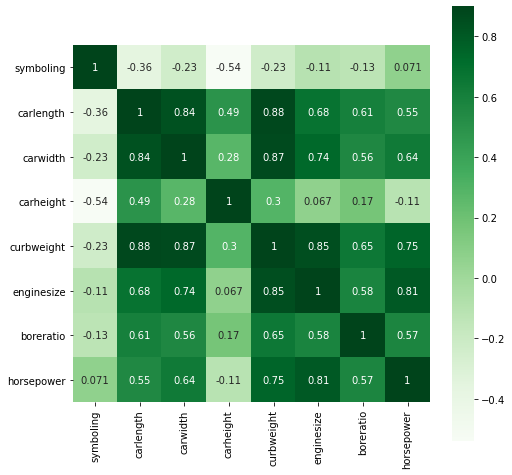

In [163]:
mc_check = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight',
                                 'curbweight','enginesize','boreratio','horsepower']]
mc_check.corr()

plt.subplots(figsize=(8,8))
sns.heatmap(mc_check.corr(), vmax=0.9, cmap="Greens", square=True, annot=True)

In [164]:
mc_check = numerical_columns_df[['carwidth','enginesize','horsepower']]
mc_check.corr()

,carwidth,enginesize,horsepower
carwidth,1.000,0.735,0.641
enginesize,0.735,1.000,0.810
horsepower,0.641,0.810,1.000


# Splitting & Overfitting Check

In [170]:
"""
Recall our last model with 3 features;
Y = numerical_columns_df['price']
X = numerical_columns_df[['carwidth','enginesize','horsepower']]
"""

"\nRecall our last model with 3 features;\nY = numerical_columns_df['price']\nX = numerical_columns_df[['carwidth','enginesize','horsepower']]\n"

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.155, random_state = 42)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 173
The number of observations in test set is 32


In [176]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [177]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

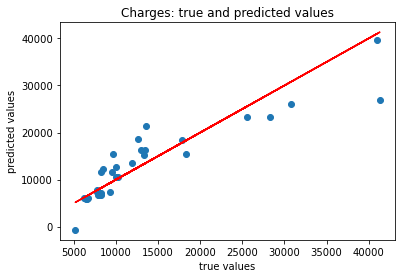

In [178]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [179]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8165377304339947
-----Test set statistics-----
R-squared of the model in test set is: 0.815874029472832
Mean absolute error of the prediction is: 2793.394569664898
Mean squared error of the prediction is: 16238717.84852459
Root mean squared error of the prediction is: 4029.7292525087328
Mean absolute percentage error of the prediction is: 22.281258277759573


This model is very good in both R^2 metrics; the training sets R^2 value is 0.816 and the test sets R^2 value is 0.815.
Thus, there is no overfitting or underfitting.

# Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.

ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

The model is messed up with this alpha value. So I'll try different alpha values below.

In [180]:
values = [-10,-5,0,5,10,15,20]
results = list(map(lambda x: (10**x), values))
results

[1e-10, 1e-05, 1, 100000, 10000000000, 1000000000000000, 100000000000000000000]

In [183]:
for alpha in results:
    ridgeregr = Ridge(alpha) 
    ridgeregr.fit(X_train, y_train)
    
    # We are making predictions here
    y_preds_train = ridgeregr.predict(X_train)
    y_preds_test = ridgeregr.predict(X_test)
    
    print("\n---------------NEW MODEL with alpha = {} ----------".format(alpha))
    print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
    print("-------------Test set statistics----------")
    print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))



---------------NEW MODEL with alpha = 1e-10 ----------
R-squared of the model in training set is: 0.8165377304339946
-------------Test set statistics----------
R-squared of the model in test set is: 0.8158740294728366
Mean absolute error of the prediction is: 2793.3945696648116
Mean squared error of the prediction is: 16238717.848524183
Root mean squared error of the prediction is: 4029.7292525086823
Mean absolute percentage error of the prediction is: 22.281258277758297

---------------NEW MODEL with alpha = 1e-05 ----------
R-squared of the model in training set is: 0.8165377304339947
-------------Test set statistics----------
R-squared of the model in test set is: 0.8158740299395966
Mean absolute error of the prediction is: 2793.3945611536938
Mean squared error of the prediction is: 16238717.807358976
Root mean squared error of the prediction is: 4029.7292474009932
Mean absolute percentage error of the prediction is: 22.28125815636637

---------------NEW MODEL with alpha = 1 ------

So, as the alpha value increases, Ridge Regression is messing up the model.

# Lasso Regression

In [184]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0015270869234345064
Mean absolute error of the prediction is: 6569.820789559248
Mean squared error of the prediction is: 88328201.26156357
Root mean squared error of the prediction is: 9398.30842553933
Mean absolute percentage error of the prediction is: 52.185530417334505


Again, it messed up the model. Let us try different alpha values in here as well.

In [185]:
for alpha in results:
    lassoregr = Lasso(alpha)
    lassoregr.fit(X_train, y_train)
    
    # We are making predictions here
    y_preds_train = lassoregr.predict(X_train)
    y_preds_test = lassoregr.predict(X_test)
    
    print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
    print("------------Test set statistics--------------")
    print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
    print("\n---------------NEW MODEL-------------------")

R-squared of the model in training set is: 0.8165377304339947
------------Test set statistics--------------
R-squared of the model in test set is: 0.8158740294728326
Mean absolute error of the prediction is: 2793.3945696648807
Mean squared error of the prediction is: 16238717.84852454
Root mean squared error of the prediction is: 4029.7292525087264
Mean absolute percentage error of the prediction is: 22.28125827775927

---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.8165377304339946
------------Test set statistics--------------
R-squared of the model in test set is: 0.8158740295528677
Mean absolute error of the prediction is: 2793.394568097472
Mean squared error of the prediction is: 16238717.841465969
Root mean squared error of the prediction is: 4029.7292516329144
Mean absolute percentage error of the prediction is: 22.28125825474177

---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.8165377230214763
----

It got worse faster than the Rigde Regression, unfortunately.

# ElasticNet Regression

In [186]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0015270869234345064
Mean absolute error of the prediction is: 6569.820789559248
Mean squared error of the prediction is: 88328201.26156357
Root mean squared error of the prediction is: 9398.30842553933
Mean absolute percentage error of the prediction is: 52.185530417334505


Again, it messed up the model. Let us try different alpha values in here as well.

In [187]:
for alpha in results:
    elasticregr = ElasticNet(alpha, l1_ratio=0.5) 
    elasticregr.fit(X_train, y_train)
    
    # We are making predictions here
    y_preds_train = elasticregr.predict(X_train)
    y_preds_test = elasticregr.predict(X_test)
    
    print("\n---------------NEW MODEL-------------------")
    print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
    print("-----Test set statistics-----")
    print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.8165377304339947
-----Test set statistics-----
R-squared of the model in test set is: 0.8158740294732362
Mean absolute error of the prediction is: 2793.394569657524
Mean squared error of the prediction is: 16238717.848488947
Root mean squared error of the prediction is: 4029.7292525043104
Mean absolute percentage error of the prediction is: 22.28125827765436

---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.8165377304338343
-----Test set statistics-----
R-squared of the model in test set is: 0.8158740698878476
Mean absolute error of the prediction is: 2793.3938326635725
Mean squared error of the prediction is: 16238714.284182021
Root mean squared error of the prediction is: 4029.7288102528714
Mean absolute percentage error of the prediction is: 22.28124776577796

---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.8154721

Same thing goes for ElasticNet Regression

# Cross Validation

In [188]:
# Recall our 1st model
Y = numerical_columns_df['price']

X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)


print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  273.18463138   -55.20304422   674.61643227   289.92547944
     2.60726727    87.51578935 -1112.52522885    54.64153725]

Intercept: 
 -57135.93163962744


**K-Fold Cross Validation**

In [189]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=7, shuffle=True, random_state=1111)

In [190]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 175
No.1 Test set size     : 30
---------------------------- 

No.2 Train set size : 175
No.2 Test set size     : 30
---------------------------- 

No.3 Train set size : 176
No.3 Test set size     : 29
---------------------------- 

No.4 Train set size : 176
No.4 Test set size     : 29
---------------------------- 

No.5 Train set size : 176
No.5 Test set size     : 29
---------------------------- 

No.6 Train set size : 176
No.6 Test set size     : 29
---------------------------- 

No.7 Train set size : 176
No.7 Test set size     : 29
---------------------------- 



In [191]:
from sklearn.metrics import mean_squared_error

pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X.loc[train_indeks], Y[train_indeks]
    X_test, y_test = X.loc[test_indeks], Y[test_indeks]
    
    lrm.fit(X_train, y_train)
    
    prediction = lrm.predict(X_test)
    
    score = lrm.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.523
----------------------- 

Piece No.2 score: 0.778
----------------------- 

Piece No.3 score: 0.828
----------------------- 

Piece No.4 score: 0.838
----------------------- 

Piece No.5 score: 0.878
----------------------- 

Piece No.6 score: 0.846
----------------------- 

Piece No.7 score: 0.681
----------------------- 



5th splitting worked best, whereas the result of the first splitting were the worse.

In [192]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.77


**Cross Validation with cross_val_score() and cross_validate()**

In [193]:
from sklearn.model_selection import cross_validate, cross_val_score
cv = cross_validate(estimator=lrm,
                    X=X,
                    y=Y,
                    cv=7,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.84013318 0.81632875 0.79570411 0.8528583  0.8361994  0.82697
 0.83673603]
--------------------------------------------------
Test Scores     :
[ 0.71516272  0.80585952  0.79941066  0.05603649  0.68025215 -0.19176997
  0.51444149]


**There are some over-fitting splittings, however, our general model did not perform that way.**

In [194]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.8292756837131235
Mean score of test set  :  0.4827704357027674


Test scores were poor since one of the test resulted negatively. However, the other tests were sufficient enough and they weren't overfitting.

# Hyperparameter Tuning

**Grid Search**

In [195]:
from sklearn.model_selection import GridSearchCV

lrm.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [196]:
y = numerical_columns_df['price']
X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]
# define model
model = linear_model.LinearRegression()

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.155, random_state = 42)

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=7)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.7550890661598988
Residual sum of squares: 15729928.07


# Recall Our Model & Do Some KNN

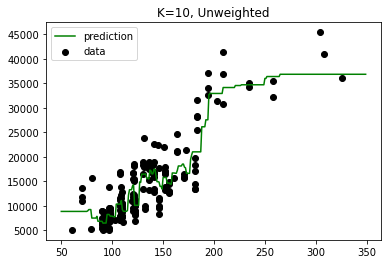

In [200]:
from sklearn import neighbors

# Build our model with enginesize only.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = numerical_columns_df[['enginesize']]
Y = numerical_columns_df['price']
knn.fit(X, Y)
# Set up our prediction line.
T = np.arange(50, 350, 1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

So as the number of neighbors decreases, our model becomes more over-fitting, and vice versa.

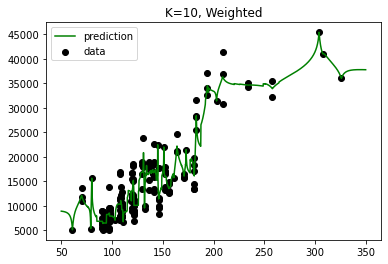

In [201]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = numerical_columns_df[['enginesize']]
Y = numerical_columns_df['price']
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(50, 350, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [202]:
# Validating KNN for 10 neighbors
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.52 (+/- 0.56)
Weighted Accuracy: 0.38 (+/- 0.72)


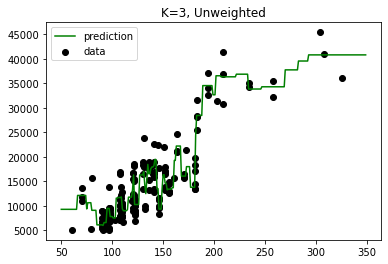

In [203]:
# Build our model with enginesize only but different number of neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
X = numerical_columns_df[['enginesize']]
Y = numerical_columns_df['price']
knn.fit(X, Y)
# Set up our prediction line.
T = np.arange(50, 350, 1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()

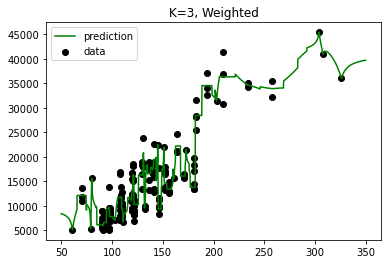

In [204]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')
X = numerical_columns_df[['enginesize']]
Y = numerical_columns_df['price']
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(50, 350, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=3, Weighted')
plt.show()

In [205]:
# Validating KNN for 3 neighbors
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.25 (+/- 1.18)
Weighted Accuracy: 0.24 (+/- 1.08)


As the number of neighbors decreases, values got worsened.

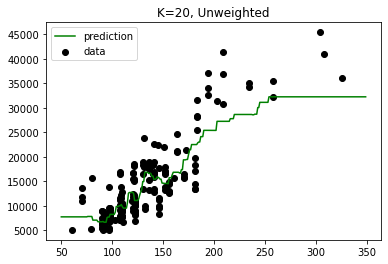

In [206]:
# Build our model with enginesize only.
knn = neighbors.KNeighborsRegressor(n_neighbors=20)
X = numerical_columns_df[['enginesize']]
Y = numerical_columns_df['price']
knn.fit(X, Y)
# Set up our prediction line.
T = np.arange(50, 350, 1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=20, Unweighted')
plt.show()

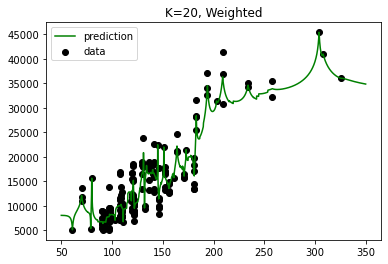

In [207]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
X = numerical_columns_df[['enginesize']]
Y = numerical_columns_df['price']
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(50, 350, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=20, Weighted')
plt.show()

In [208]:
# Validating KNN for 20 neighbors
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.49 (+/- 0.46)
Weighted Accuracy: 0.38 (+/- 0.61)


Values got worsened for that case, too.

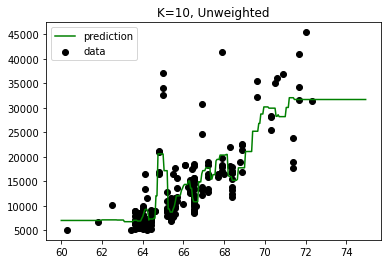

In [209]:
# Build our model with carwidth only.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = numerical_columns_df[['carwidth']]
Y = numerical_columns_df['price']
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(60, 75, 0.05)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

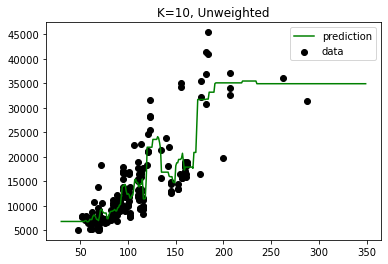

In [210]:

# Build our model with horsepower only.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = numerical_columns_df[['horsepower']]
Y = numerical_columns_df['price']
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(30, 350, 1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

# Decision Tree

In [226]:
from sklearn.tree import DecisionTreeRegressor

Y = numerical_columns_df['price']

X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.155, random_state = 42)


In [227]:
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [228]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("RMSE value of Decision Tree : {:.2f}".format(rmse_ka))

RMSE value of Decision Tree : 2528.55


In [230]:
dt_reg = DecisionTreeRegressor(max_depth=10)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [231]:
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("RMSE value of Decision Tree : {:.2f}".format(rmse_ka))

RMSE value of Decision Tree : 2677.50


Larger depth did not increase our RMSE value.

# Random Forest

In [232]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=25, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [233]:
y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 2207.83


RMSE value of the Random Forest is strictly less than the RMSE value of the Decision Tree.

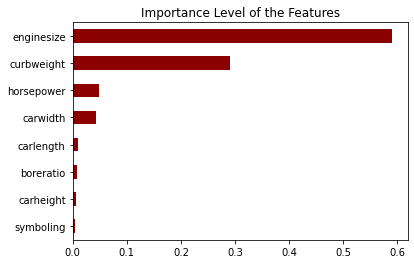

In [234]:
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

Random Forest with lesser (15) estimators;

In [235]:
random_forest = RandomForestRegressor(n_estimators=15, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=15, random_state=2)

In [236]:
y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 2177.41


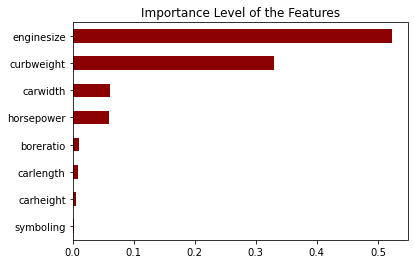

In [237]:
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

Our most important feature is enginesize, followed by curbweight.

Random Forest with lesser (10) estimators;

In [238]:
random_forest = RandomForestRegressor(n_estimators=10, random_state=2)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 2299.87


RMSE value has increased.

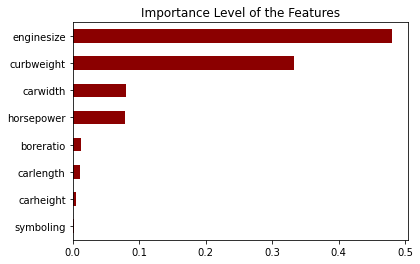

In [239]:
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

The most important features do not change.

# Creating another linear reg. model with only these two features

In [240]:
Y = numerical_columns_df['price']

X = numerical_columns_df[['curbweight','enginesize']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  5.09213056 113.54147405]

Intercept: 
 -14145.80824926162


In [241]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           3.77e-70
Time:                        19:06:27   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+04   1387.924    -10.192      0.000   -1.69e+04   -1.14e+04
curbweight     5.0921      0.930      5.472      0.000       3.257       6.927
enginesize   113.5415     11.635      9.759      0.000      90.601     136.482
==============================================================================
Omnibus:                       38.837   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.341
Skew:                           0.871   Prob(JB):                     1.78e-19
Kurtosis:                       5.659   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It didn't performed well as our previous 3 models.

In [254]:
#Ridge Regression on this model

ridgeregr = Ridge(alpha=10**2) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8227541263288798
-----Test set statistics-----
R-squared of the model in test set is: 0.8226794243541878
Mean absolute error of the prediction is: 2730.840491946561
Mean squared error of the prediction is: 15638526.104743265
Root mean squared error of the prediction is: 3954.5576370490876
Mean absolute percentage error of the prediction is: 21.713258122769613


Ridge Regression improved the performance.

In [253]:
# Lasso Regression on this model

lassoregr = Lasso(alpha=10**2) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8239252064994056
-----Test set statistics-----
R-squared of the model in test set is: 0.8210206847969607
Mean absolute error of the prediction is: 2734.2532721519156
Mean squared error of the prediction is: 15784816.188520575
Root mean squared error of the prediction is: 3973.0109726151745
Mean absolute percentage error of the prediction is: 21.780158693700074


Scores are near to the Ridge Regression's

# SVM

In [255]:
#Recall our very basic model
Y = numerical_columns_df['price']

X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.155, random_state = 42)


In [256]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 4431.46


In [257]:
# With our 3rd model
Y = numerical_columns_df['price']

X = numerical_columns_df[['carwidth','enginesize','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.155, random_state = 42)


In [258]:
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 3996.95


Our RMSE value has dropped with lesser features.

RMSE values with different kernels;

In [259]:
svr_reg = SVR(kernel='poly', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = poly): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = poly): 4498.87


In [260]:
svr_reg = SVR(kernel='sigmoid', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = sigmoid): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = sigmoid): 9825.33


Since our target variable behaves as a linear function, linear kernel performed the best.

In [261]:
# Linear kernel with different Epsilon values;
epsil = [0.1, 0.3, 0.5, 0.7, 0.9, 1]

for eps in epsil:
    Y = numerical_columns_df['price']
    X = numerical_columns_df[['carwidth','enginesize','horsepower']]
    lrm = linear_model.LinearRegression()
    lrm.fit(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.155, random_state = 42)
    
    svr_reg = SVR(kernel='linear', C=1, epsilon=eps)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_predict)**(1/2)
    print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 3996.95
 Value of RMSE (Kernel = linear): 3996.76
 Value of RMSE (Kernel = linear): 3996.58
 Value of RMSE (Kernel = linear): 3996.39
 Value of RMSE (Kernel = linear): 3996.20
 Value of RMSE (Kernel = linear): 3996.10


Epsilon values didn't change our RMSE value that much. Maybe we can play with C values.

In [262]:
# Linear kernel with different C values;

values2 = [-3,-2,-1,0,1,2,3,4,5]
results2 = list(map(lambda x: (10**x), values2))

for c in results2:
    Y = numerical_columns_df['price']
    X = numerical_columns_df[['carwidth','enginesize','horsepower']]
    lrm = linear_model.LinearRegression()
    lrm.fit(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.155, random_state = 42)
    
    svr_reg = SVR(kernel='linear', C=c)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_predict)**(1/2)
    print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 9461.61
 Value of RMSE (Kernel = linear): 7216.45
 Value of RMSE (Kernel = linear): 4507.96
 Value of RMSE (Kernel = linear): 3996.95
 Value of RMSE (Kernel = linear): 3957.88
 Value of RMSE (Kernel = linear): 4116.43
 Value of RMSE (Kernel = linear): 4147.04
 Value of RMSE (Kernel = linear): 4226.70
 Value of RMSE (Kernel = linear): 4614.88


We got our best result when C=1. If we had it when C=0, then we should have check for overfitting.

# XGBoost

In [ ]:
!pip install xgboost

In [263]:
import xgboost as xgb
Y = numerical_columns_df['price']
X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.155, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [264]:
xg_reg.fit(X_train,y_train)
y_predict = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 1606.997736


Our RMSE value has decreased to an amazing level compared to the other methods.
Recall that this used **"gbtree" as booster** as its set by default.

In [265]:
# XGBoost with "gblinear" booster

DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [266]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 5945.896700


It performed very poorly.

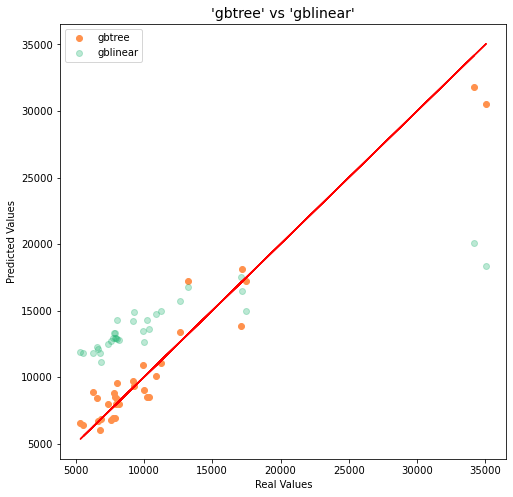

In [267]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' vs 'gblinear'", size = 14)
ax1 = plt.scatter(y_test, y_predict, color = '#FF914D')
ax2 = plt.scatter(y_test, y_predict_gblinear, color='#22B573', alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

# Cross Validation with XGBoost

In [268]:
# cross val with 7-folds
car_prices_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":4}
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=7, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
14,977.004,51.257,2183.435,545.888
13,1031.341,53.746,2211.826,556.972
12,1096.113,58.263,2221.270,567.299
11,1172.628,60.735,2263.060,570.889
10,1271.603,61.201,2290.834,563.695


In [269]:
# cross val with 7-folds with larger depth
car_prices_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":7}
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=7, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
12,707.361,32.556,2211.081,697.848
11,809.186,34.984,2218.041,699.364
10,946.407,38.729,2252.166,714.873
9,1126.904,41.540,2305.561,714.286
8,1368.282,46.071,2390.457,716.787


It performed poorer than the previous one.

In [270]:
# cross val with 4-folds and lesser depth
car_prices_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":3}
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=7, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
29,861.906,38.845,2154.657,574.824
28,881.004,40.625,2159.808,569.739
26,928.711,43.030,2171.979,569.624
27,899.975,40.460,2172.726,567.851
25,950.694,46.714,2177.001,566.185


It performed a little better than with depth 4.

In [271]:
# cross val with 4-folds and lesser depth
car_prices_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":3}
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
34,718.534,48.026,2041.855,444.232
33,733.263,51.118,2050.242,437.719
30,786.643,66.886,2050.397,448.977
31,772.458,67.264,2050.605,440.946
32,749.747,57.865,2053.430,437.672


RMSE got a little bit better now.

In [272]:
# cross val with 4-folds and depth 4
car_prices_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":4}
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
39,420.305,34.620,1975.201,423.591
38,432.573,34.886,1976.671,422.692
37,440.172,34.087,1978.635,423.033
32,498.772,30.786,1980.191,429.501
36,446.424,34.298,1980.707,423.070


RMSE value has decreased to 1975.201 in the 39th iteration.
Let us check MAE scores;

In [273]:
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="mae", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-mae-mean').head(5))

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
39,301.396,26.704,1402.683,286.552
38,311.479,27.888,1403.016,282.468
37,318.377,26.766,1405.226,283.018
32,371.538,27.492,1405.719,285.860
35,332.700,27.245,1406.173,280.457


Again, we got the best result in the 39th iteration. However, they are still far from sufficient.

# Regularization with XGBoost

In [274]:
car_prices_dmatrix = xgb.DMatrix(data=X, label=y)

l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":4}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [275]:
print("Best 11 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(best_values.sort_values('rmse').head())

Best 11 values:


,l1,rmse
17,0.180,1975.198
18,0.190,1975.198
15,0.160,1975.198
13,0.140,1975.198
14,0.150,1975.198


# Hyperparameter Tuning in XGBoost

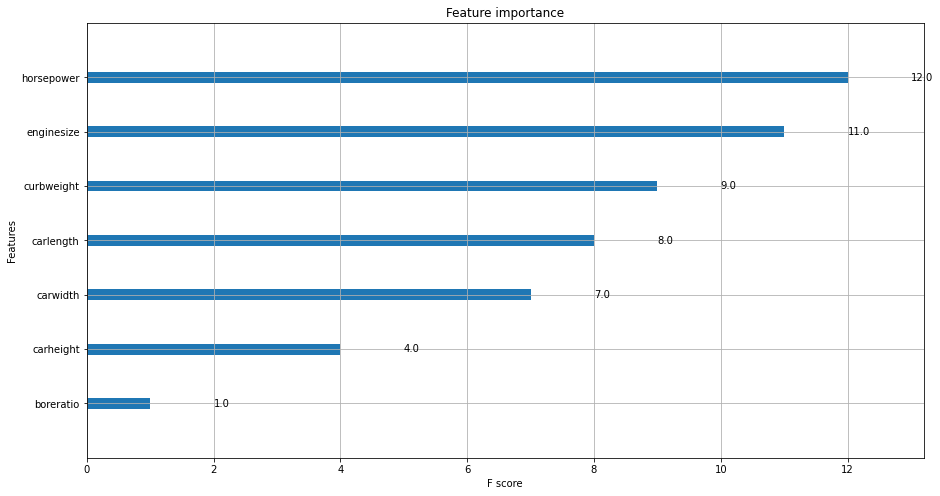

In [276]:
# Most important features wrt. to depth level 3
best_parameters = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3
                      }

car_prices_model = xgb.train(params=best_parameters, 
                             dtrain=car_prices_dmatrix,
                             num_boost_round=10)

ax = xgb.plot_importance(car_prices_model)
ax.figure.set_size_inches(15,8)
plt.show()

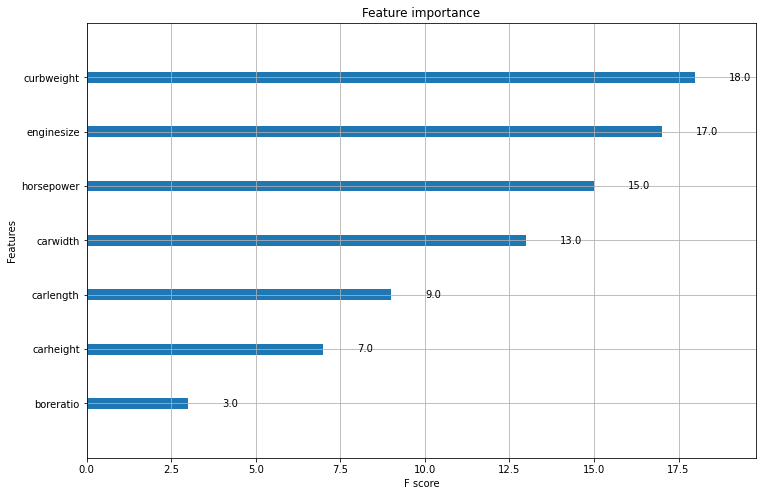

In [277]:
# Most important features wrt. to depth level 4
best_parameters = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 4, 
                       'min_child_weight': 3
                      }

car_prices_model = xgb.train(params=best_parameters, 
                             dtrain=car_prices_dmatrix,
                             num_boost_round=10)

ax = xgb.plot_importance(car_prices_model)
ax.figure.set_size_inches(12,8)
plt.show()

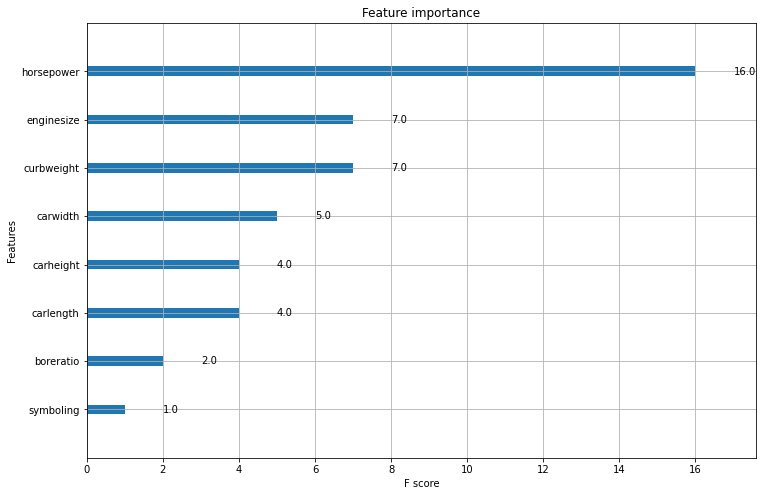

In [278]:
# Most important features wrt. to depth level 3
best_parameters = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 5
                      }

car_prices_model = xgb.train(params=best_parameters, 
                             dtrain=car_prices_dmatrix,
                             num_boost_round=10)

ax = xgb.plot_importance(car_prices_model)
ax.figure.set_size_inches(12,8)
plt.show()

Curbweight always gets a place in the first 3 features. It may be better to implement it in the upcoming models,
if one wants to create another model.